#### **Findings from Baseline LSTM Model (Trained on KOSPI Daily 10-Year Data)**

**1️⃣ Model Performance Overview**
The goal was to predict stock prices based on historical trends and technical indicators. Below is a summary of the training process and evaluation results:

**📌 Training Observations**
- The model **trained for 13 epochs** before early stopping was triggered
- The final **train loss** and **validation loss** indicate that the model learned patterns but still has room for improvement
- We introduced **learning rate scheduling (ReduceLROnPlateau)** and **loss weighting** to improve generalization
- The model **smoothly converged** but still shows some **slight underfitting** (we need to improved feature engineering)

**📌 Evaluation Results** 

**✅ Model Strengths:**
✔️ **Consistent Trends:** the trend seems follows the overall **uptrend/downtrend of the stock price** reasonably well -> however there still much more room for improvement (any suggestion would be great)  
✔️ **Low Short-Term Prediction Errors:** For small time intervals, **predictions are close to actual prices**so it is generalising the recent movement quite better than before
✔️ **Stable Forecasting:** our model doesn't overreact to noise or outliers either

**⚠️ Model Weaknesses:**
⚠️ **lag in preds:** The model tends to predict lower values than actual priceswhen prices are rising
⚠️ **over-Smoothing:** The predictions do not capture sudden spikes/drops in stock prices, leading to a loss of precision in volatile markets
⚠️ **underestimation of market jumps:** we noticed that when the market experiences strong jump, the model lags behind the actual trend so it is safe to assume that we need to figure out how to deal with the bullish surges that occurs

---

**2️⃣ What i'm gonna try to do**

We need to increase the acc & lower preds lag 

**🔹 1. More Feature Engineering**
- **add fundamental Data:** such as financial ratios (P/E ratio, earnings growth) to capture macroeconomic trends, however I have to learn more about it first
- **add SA:** we will scrap some news n integrate news headlines & investor sentiment scores to predict market sentiment shifts
- **more technical indicators:** for better detecting price volatility.

**🔹 2. Increase Training Capacity**
- **test more lookback period:** right now, we use 120-day lookback windows. I had tested with 180 so i'm going to increase it to 240d next, hoping this will improve long-term trend preds
- **tune hyperparameters:** I've adjusted and will continue to adjust  hidden layers, dropout, batch size and learning rate decay 
- **more ppochs:** because our early stopping is triggered quickly 

**🔹 3. Reduce Prediction Lag**
- **attention mechanism**
- **ensemble LSTM with transformer**: aim to improve the model’s ability to capture sharp price movements and sudden changes 
- **RL (Phase 6)**: I will train the model to actively optimize buy/sell signals instead of passive prediction.

---

**3️⃣ Next Steps in Our Project Roadmap**
Based on our **milestone roadmap**, here’s what we need to do next:

| **Phase** | **Task** | **Status** | **Next Steps** |
| --- | --- | --- | --- |
| ✅ **Phase 1: Baseline AI Model** | Develop **LSTM model** and test with **KOSPI daily 10y data** | ✅ Completed | Fine-tune the model |
| 🔄 **Phase 2: Data Collection & Preprocessing** | Collect **real-time stock data** from APIs | In Progress | Implement **live data pipeline** |
| 🔄 **Phase 3: Top 5 Stock Selection** | Select the **5 best-performing stocks** based on fundamental & technical analysis | In Progress | Develop stock ranking system |
| 🔜 **Phase 4: Sentiment Analysis** | Scrape **news sentiment** from Naver API, Twitter, and financial reports | Upcoming | Merge sentiment scores with model features |
| 🔜 **Phase 5: AI Model Expansion** | **Integrate Transformer Model** for more accurate forecasting | Upcoming | Test LSTM+Transformer hybrid model |
| 🔜 **Phase 6: Reinforcement Learning (RL)** | Train **RL agent** to optimize **buy/sell decisions** | Upcoming | Train model with **profit-based rewards** |
| 🔜 **Phase 7: Trading Strategy & Risk Management** | Implement **stop-loss, take-profit, risk-aware exit strategies** | Upcoming | Simulate live trading scenarios |

**4️⃣Immediate Next Action:**
- **Fine-tune our LSTM model** (longer lookback window, more epochs, improved features).
- **Start selecting the Top 5 stocks** (identify which stocks we will focus on for recommendations).
- **Implement real-time stock data collection** (Naver API, KIS API).

---

This baseline LSTM model needs more feature engineering, a larger lookback window, and hybrid modeling (Transformer + RL) to improve accuracy. 

Our next immediate goal is to enhance model generalization, reduce lag, and integrate stock selection mechanisms before moving into reinforcement learning and real-time trading strategies

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
print("Current Dir:", os.getcwd())

Current Dir: d:\ai_team\stock_pred_strat\notebooks


In [21]:
df = pd.read_csv("../predictions_baseline_lstm.csv")

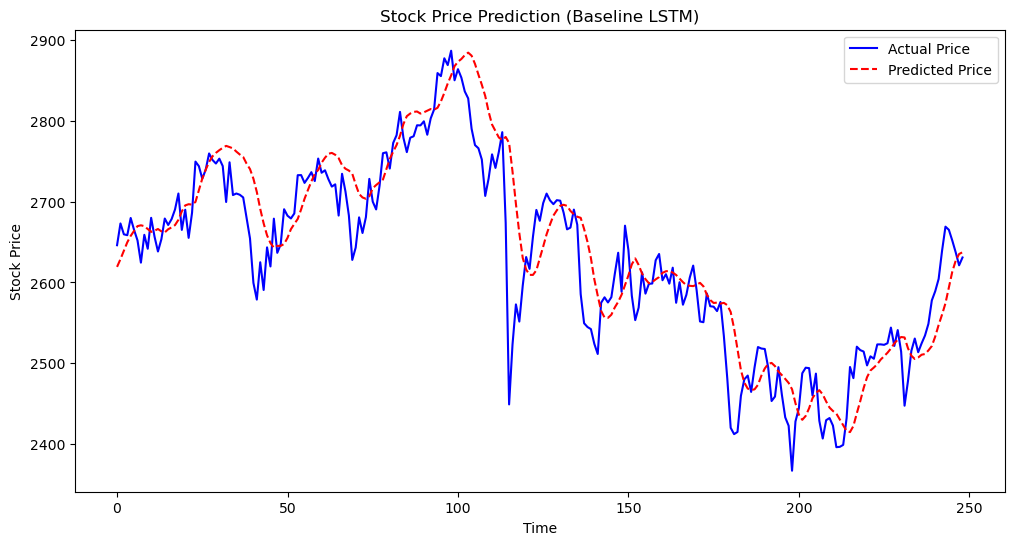

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df["Actual"], label="Actual Price", color="blue")
plt.plot(df["Predicted"], label="Predicted Price", color="red", linestyle="dashed")
plt.legend()
plt.title("Stock Price Prediction (Baseline LSTM)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

In [25]:
actual = df["Actual"].values
predicted = df["Predicted"].values

mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = mean_squared_error(actual, predicted, squared=False) 
r2 = r2_score(actual, predicted)
mape = (abs(actual - predicted) / actual).mean() * 100

print(f"📌 Model Evaluation Metrics:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"🔹 R-Squared (R²): {r2:.4f}")
print(f"🔹 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

📌 Model Evaluation Metrics:
🔹 Mean Absolute Error (MAE): 37.0812
🔹 Mean Squared Error (MSE): 2762.3894
🔹 Root Mean Squared Error (RMSE): 52.5584
🔹 R-Squared (R²): 0.7880
🔹 Mean Absolute Percentage Error (MAPE): 1.43%


c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- the model captures most of the price movements 
- the model is good but it is accurate for short-term trends only
- we will add more technical indicator, feature eng, sentiment, macro variables for improvement
- we will also ensemble hybrid models such as transformer + lstm, and RL for better robust signal prediction

🚀 Next Step: Portfolio & Stock Selection
Now that the baseline model pipeline is ready, we can proceed with: ✅ Stock Ranking Model: Identify the Top 5 Stocks using fundamental + technical criteria.
✅ Reinforcement Learning (RL) Integration: Train an RL agent to optimize Buy/Sell/Hold decisions.
✅ Backtesting & Risk Management: Run historical simulations to validate profitability & drawdowns.

Would you like to start with stock ranking or trading strategy refinement next? 🚀📈